# Homework 5

* Due 12/09 23:59 pm est
* Following instructions provided in **Homework submission instructions**

# Problem 1 (40 pts)

A professor measured the time (in seconds) required to catch a falling yard stick for 12 randomly selected students' dominant hand and nondominant hand.  The professor claims that the reaction time in an individual’s dominant hand is less than the reaction time in their nondominant hand.  Test the claim at the $\alpha$ = 0.05 level of significance.


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Student</th>
      <th>Dominent Hand, $x_1$</th>
      <th>Nondominent Hand, $x_2$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.177</td>
      <td>0.179</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.210</td>
      <td>0.202</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.189</td>
      <td>0.184</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.198</td>
      <td>0.215</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.194</td>
      <td>0.193</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.160</td>
      <td>0.194</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.163</td>
      <td>0.160</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.166</td>
      <td>0.209</td>
    </tr>
      <tr>
      <th>9</th>
      <td>0.152</td>
      <td>0.164</td>
    </tr>
      <tr>
      <th>10</th>
      <td>0.190</td>
      <td>0.210</td>
    </tr>
      <tr>
      <th>11</th>
      <td>0.172</td>
      <td>0.197</td>
    </tr>
      <tr>
      <th>12</th>
      <td>0.186</td>
      <td>0.208</td>
    </tr>
  </tbody>
</table>
</div>

## Part 1 - 10 pts

What is the null and alternative hypothesis?

Let $\mu_1$ be the population average reaction time for the dominant hand, and $\mu_2$ be the population average reaction time for the nondominant hand.
$$H_0: \mu_1 = \mu_2 \rightarrow d = 0$$
$$H_1: \mu_1 < \mu_2 \rightarrow d < 0$$

## Part 2 - 10 pts

What is the correct test to perform? Is the underlying assumption satisfied? If not, check the assumptions.

1. **Paired t test**, since two population are dependent.

2. With a small sample size of 12, it is necessary to check the normality assumption (on d).

In [1]:
import scipy.stats as scs
import statsmodels.stats.api as sms
import pandas as pd
dominant = pd.Series([0.177, 0.210, 0.189, 0.198, 0.194, 0.16, 0.163, 0.166, 0.152, 0.19, 0.172, 0.186])
nondominant = pd.Series([0.179, 0.202, 0.184, 0.215, 0.193, 0.194, 0.16, 0.209, 0.164, 0.210, 0.197,0.208])
d = dominant-nondominant
scs.shapiro(d)

ShapiroResult(statistic=0.9432522654533386, pvalue=0.5413171052932739)

## Part 3 - 20 pts

Conduct the test to test the claim.

In [2]:
t_score, p_value = scs.ttest_1samp(d, popmean=0, alternative='less')
print('The test statistics is {}, and the p value is {}.'.format(float(t_score.round(4)), float(p_value.round(4))))

The test statistics is -2.7759, and the p value is 0.009.


# Problem 2 (40 pts)

## Part 1 - 10 pts

Suppose you would like to simulate the experiment of flipping a coin that gives head with probability $p$ and tail with probability $1-p$. Write a function that simulate this coin flipping experiment.

**Note**: Your function shoud take $p$ as input and return either "head" or "tail". 

In [3]:
import numpy as np
def random_coin(p):
    U = np.random.uniform()
    if U < p:
        return "head"
    else:
        return "tail"

## Part 2 - 10 pts

Specify a value of $p$, say $0.3$, create a list that contains 1000 flips of such coin. Use the list, create a barplot for "head" and "tail". Does the number of heads and tails make sense for the $p$ you specify?

<AxesSubplot:>

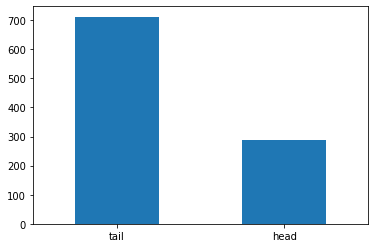

In [4]:
coins = [random_coin(0.3) for i in range(1000)]
pd.Series(coins).value_counts().plot.bar(rot = 0)

## Part 3 - 20 pts

The number of head in 1 flip is actually the so-called Bernoulli random variable with parameter $p$, which is a special case of the Binomial variable $Bin(1, p)$. For Bernoulli and Binomial random variables, we have the following relationship:

If $X_1$, $X_2$, $\dots$, $X_n$ are independent Bernoulli random variable from $Bernoulli(p)$, then $\sum_{i=1}^n X_i \sim Bin(n, p)$.

Now, use the function you write in part 1, generate another function that return the number of head in $n$ flips, which is a Binomial random variable.

**Note**: Your function should take 2 arguments as inputs ($n$, $p$), and return the number of head in $n$ flips.

In [5]:
def random_binomial(n, p):
    coins = [random_coin(p) for i in range(n)]
    return coins.count("head")

# Problem 3 (20 pts)

Suppose there is 365 days, denote 1-365, in a year and the chance of getting born in each day is the same. Write a function to generate a birthday for a random person. 

**Note**: The birthday of a random person is a discrete random variable that has the following distribution
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th>Birthday ($x_i$)</th>
      <th>$P$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>$\frac{1}{365}$</td>
    </tr>
    <tr>
      <th>2</th>
      <td>$\frac{1}{365}$</td>
    </tr>
    <tr>
      <th>3</th>
      <td>$\frac{1}{365}$</td>
    </tr>
    <tr>
      <th>4</th>
      <td>$\vdots$</td>
    </tr>
    <tr>
      <th>363</th>
      <td>$\frac{1}{365}$</td>
    </tr>
    <tr>
      <th>364</th>
      <td>$\frac{1}{365}$</td>
    </tr>
    <tr>
      <th>365</th>
      <td>$\frac{1}{365}$</td>
    </tr>
  </tbody>
</table>
</div>

In [6]:
def birthday():
    birthday = 1
    U = np.random.uniform()
    while U > 1/365:
        U = U - 1/365
        birthday += 1
    return birthday